### Training the ST RES NET with MITBIH / Fantasia datasets

Sampling frequency in Fantasia is 250 Hz, whereas in the MITBIH it is 360 Hz. Therefore when testing the ST_RES_NET on Fantasia dataset, the window_in_seconds parameter is set to 14.4 which is an equivalent to 10 s window in 360 Hz.

In [1]:
import numpy as np
import torch
from customLib.vis import plot_ecg
from customLib.dataset import read_dataset
from customLib.config import fantasia_path, mitbih_path
from models.models import ST_RES_NET
from customLib.print_model_parameters import print_model_parameters
from customLib.metrics import print_metrics
import pickle

In [2]:
x_train, y_train, x_test, y_test, x_val, y_val = read_dataset(mitbih_path + "\\dataset\\raw", is_validation_set=True)

x_train = np.expand_dims(x_train, 1)
y_train = np.expand_dims(y_train, 1)

x_test = np.expand_dims(x_test, 1)
y_test = np.expand_dims(y_test, 1)

x_val = np.expand_dims(x_val, 1)
y_val = np.expand_dims(y_val, 1)

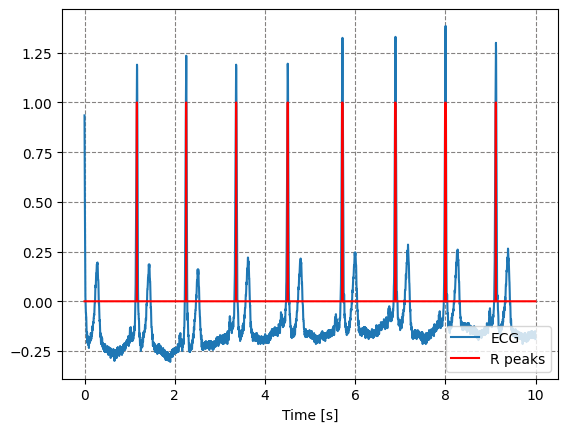

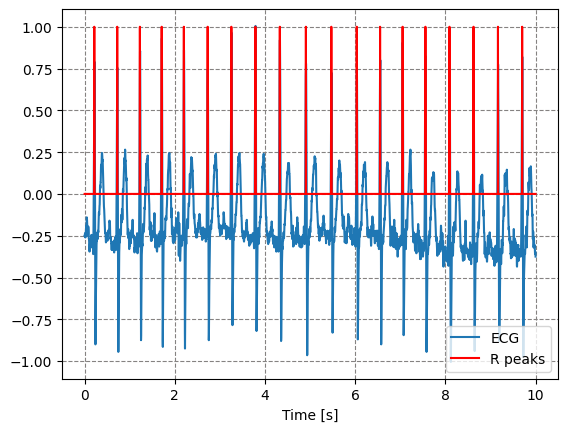

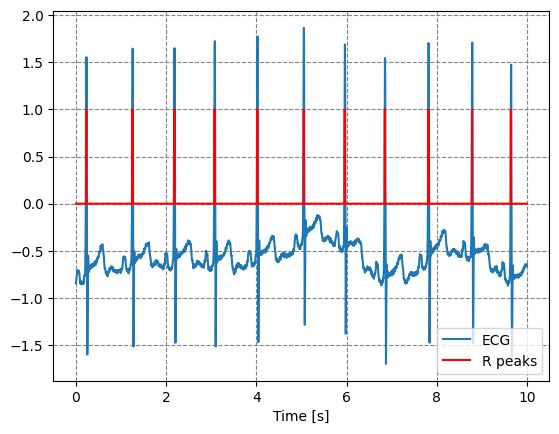

In [3]:
plot_ecg(x_train[100].flatten(), y_train[100].flatten(), 360)
plot_ecg(x_test[-1].flatten(), y_test[-1].flatten(), 360)
plot_ecg(x_val[-1].flatten(), y_val[-1].flatten(), 360)

In [6]:
# raw_ecgs with lr=1e-3
model = ST_RES_NET(learning_rate=1e-3, loss_pos_weight=17, loss_neg_weight=1, checkpoint_path="./checkpoints/st_res_net/raw_ecgs")

Training will be performed with: cuda:0


In [5]:
print_model_parameters(model)

Layer st_block_1: 10432 parameters
Layer st_block_1.bi_lstm: 8960 parameters
Layer st_block_1.conv_1: 520 parameters
Layer st_block_1.input_conv_3: 32 parameters
Layer st_block_1.input_conv_7: 64 parameters
Layer st_block_1.conv_kernel_3: 400 parameters
Layer st_block_1.conv_kernel_3.0: 200 parameters
Layer st_block_1.conv_kernel_3.1: 200 parameters
Layer st_block_1.conv_kernel_7: 456 parameters
Layer st_block_1.conv_kernel_7.0: 456 parameters
Layer st_block_2: 16480 parameters
Layer st_block_2.bi_lstm: 10752 parameters
Layer st_block_2.conv_1: 1040 parameters
Layer st_block_2.input_conv_3: 400 parameters
Layer st_block_2.input_conv_7: 912 parameters
Layer st_block_2.conv_kernel_3: 1568 parameters
Layer st_block_2.conv_kernel_3.0: 784 parameters
Layer st_block_2.conv_kernel_3.1: 784 parameters
Layer st_block_2.conv_kernel_7: 1808 parameters
Layer st_block_2.conv_kernel_7.0: 1808 parameters
Layer st_block_3: 33472 parameters
Layer st_block_3.bi_lstm: 12800 parameters
Layer st_block_3.co

====Epoch [1/50]====


100%|█████████▉| 237/238 [00:56<00:00,  4.30it/s]

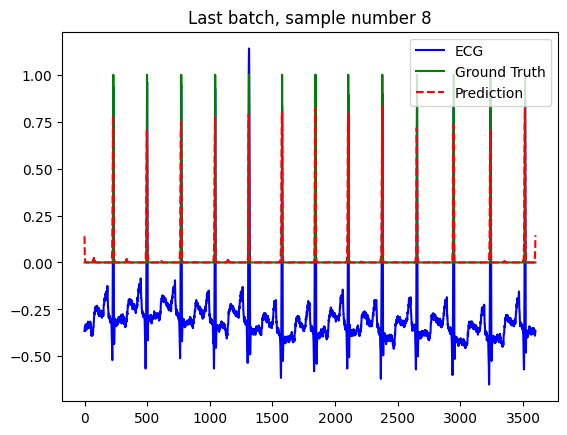

100%|██████████| 238/238 [00:56<00:00,  4.18it/s]



Train Loss: 0.1793
train Weighted Accuracy: 0.63948
train F1 Score: 0.42372
train TPR: 0.27910
train FPR: 0.00014
train TNR: 0.99986
train FNR: 0.72090



100%|██████████| 40/40 [00:03<00:00, 11.05it/s]



Validation Loss: 0.0781
validation Weighted Accuracy: 0.94763
validation F1 Score: 0.90571
validation TPR: 0.89555
validation FPR: 0.00029
validation TNR: 0.99971
validation FNR: 0.10445

====Epoch [2/50]====


100%|█████████▉| 237/238 [00:56<00:00,  4.32it/s]

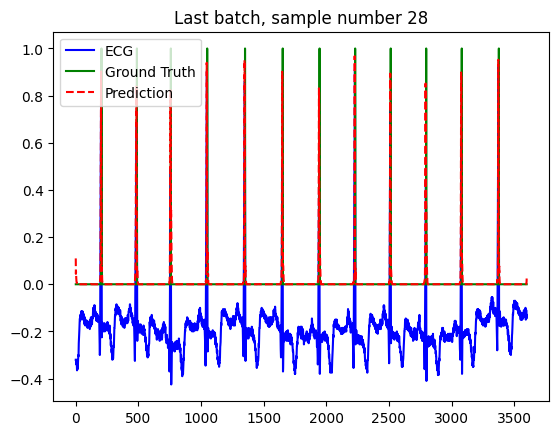

100%|██████████| 238/238 [00:57<00:00,  4.14it/s]



Train Loss: 0.0682
train Weighted Accuracy: 0.95526
train F1 Score: 0.87351
train TPR: 0.91114
train FPR: 0.00062
train TNR: 0.99938
train FNR: 0.08886



100%|██████████| 40/40 [00:03<00:00, 10.69it/s]



Validation Loss: 0.0591
validation Weighted Accuracy: 0.96494
validation F1 Score: 0.90466
validation TPR: 0.93033
validation FPR: 0.00045
validation TNR: 0.99955
validation FNR: 0.06967

====Epoch [3/50]====


100%|█████████▉| 237/238 [01:24<00:00,  2.87it/s]

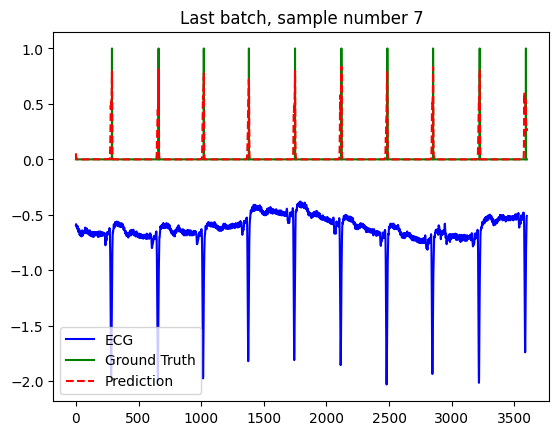

100%|██████████| 238/238 [01:26<00:00,  2.74it/s]



Train Loss: 0.0576
train Weighted Accuracy: 0.97011
train F1 Score: 0.89772
train TPR: 0.94077
train FPR: 0.00055
train TNR: 0.99945
train FNR: 0.05923



100%|██████████| 40/40 [00:05<00:00,  7.85it/s]



Validation Loss: 0.0511
validation Weighted Accuracy: 0.97617
validation F1 Score: 0.92002
validation TPR: 0.95277
validation FPR: 0.00042
validation TNR: 0.99958
validation FNR: 0.04723

====Epoch [4/50]====


100%|█████████▉| 237/238 [01:23<00:00,  2.87it/s]

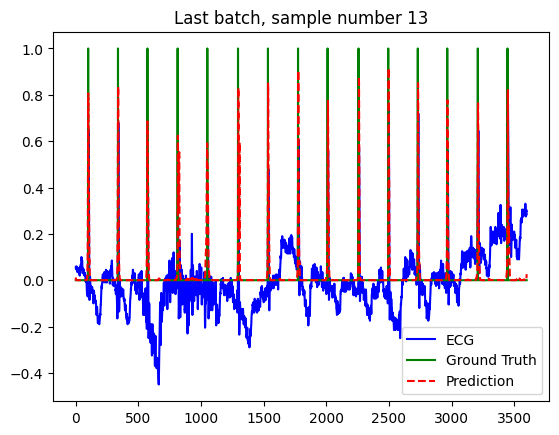

100%|██████████| 238/238 [01:24<00:00,  2.82it/s]



Train Loss: 0.0513
train Weighted Accuracy: 0.97657
train F1 Score: 0.90495
train TPR: 0.95368
train FPR: 0.00054
train TNR: 0.99946
train FNR: 0.04632



100%|██████████| 40/40 [00:05<00:00,  7.79it/s]



Validation Loss: 0.0454
validation Weighted Accuracy: 0.98130
validation F1 Score: 0.90826
validation TPR: 0.96315
validation FPR: 0.00056
validation TNR: 0.99944
validation FNR: 0.03685

====Epoch [5/50]====


100%|█████████▉| 237/238 [01:25<00:00,  2.90it/s]

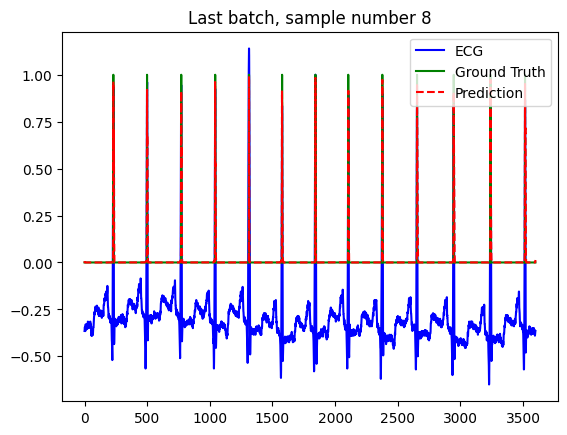

100%|██████████| 238/238 [01:26<00:00,  2.75it/s]



Train Loss: 0.0466
train Weighted Accuracy: 0.97973
train F1 Score: 0.90664
train TPR: 0.96003
train FPR: 0.00056
train TNR: 0.99944
train FNR: 0.03997



100%|██████████| 40/40 [00:05<00:00,  7.69it/s]



Validation Loss: 0.0416
validation Weighted Accuracy: 0.98347
validation F1 Score: 0.91559
validation TPR: 0.96746
validation FPR: 0.00051
validation TNR: 0.99949
validation FNR: 0.03254

====Epoch [6/50]====


100%|█████████▉| 237/238 [01:59<00:00,  2.44it/s]

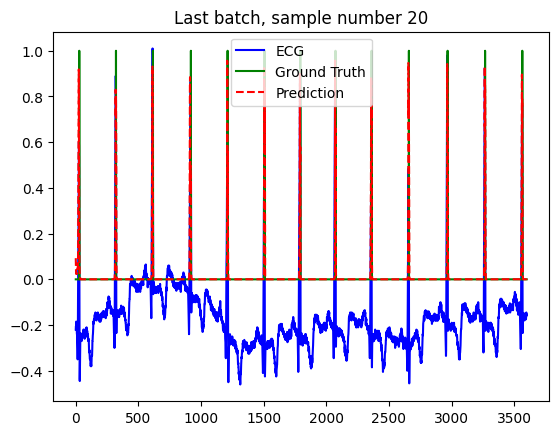

100%|██████████| 238/238 [02:01<00:00,  1.95it/s]



Train Loss: 0.0426
train Weighted Accuracy: 0.98197
train F1 Score: 0.91136
train TPR: 0.96447
train FPR: 0.00054
train TNR: 0.99946
train FNR: 0.03553



100%|██████████| 40/40 [00:05<00:00,  7.84it/s]



Validation Loss: 0.0403
validation Weighted Accuracy: 0.98453
validation F1 Score: 0.91724
validation TPR: 0.96958
validation FPR: 0.00051
validation TNR: 0.99949
validation FNR: 0.03042

====Epoch [7/50]====


100%|█████████▉| 237/238 [01:23<00:00,  2.90it/s]

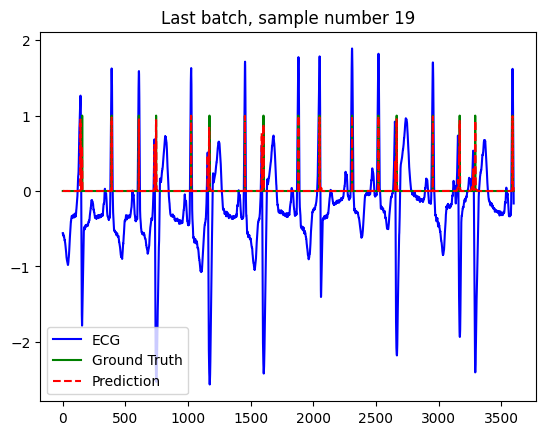

100%|██████████| 238/238 [01:24<00:00,  2.83it/s]



Train Loss: 0.0389
train Weighted Accuracy: 0.98401
train F1 Score: 0.91589
train TPR: 0.96854
train FPR: 0.00052
train TNR: 0.99948
train FNR: 0.03146



100%|██████████| 40/40 [00:05<00:00,  7.68it/s]



Validation Loss: 0.0370
validation Weighted Accuracy: 0.98495
validation F1 Score: 0.92092
validation TPR: 0.97037
validation FPR: 0.00048
validation TNR: 0.99952
validation FNR: 0.02963

====Epoch [8/50]====


100%|█████████▉| 237/238 [01:23<00:00,  2.85it/s]

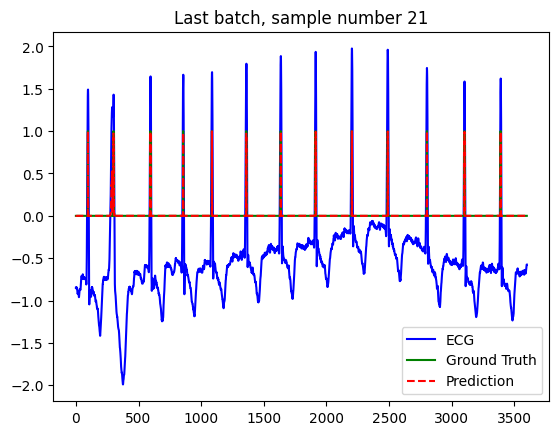

100%|██████████| 238/238 [01:24<00:00,  2.82it/s]



Train Loss: 0.0365
train Weighted Accuracy: 0.98576
train F1 Score: 0.92026
train TPR: 0.97201
train FPR: 0.00050
train TNR: 0.99950
train FNR: 0.02799



100%|██████████| 40/40 [00:05<00:00,  7.82it/s]



Validation Loss: 0.0347
validation Weighted Accuracy: 0.98677
validation F1 Score: 0.92048
validation TPR: 0.97405
validation FPR: 0.00050
validation TNR: 0.99950
validation FNR: 0.02595

====Epoch [9/50]====


100%|█████████▉| 237/238 [01:33<00:00,  2.45it/s]

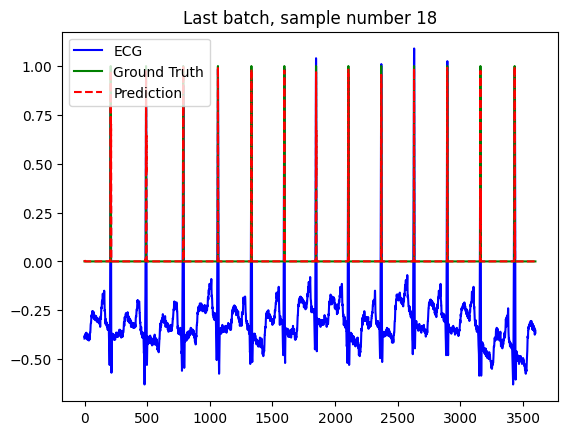

100%|██████████| 238/238 [01:35<00:00,  2.48it/s]



Train Loss: 0.0341
train Weighted Accuracy: 0.98711
train F1 Score: 0.93054
train TPR: 0.97464
train FPR: 0.00042
train TNR: 0.99958
train FNR: 0.02536



100%|██████████| 40/40 [00:05<00:00,  7.80it/s]



Validation Loss: 0.0317
validation Weighted Accuracy: 0.98708
validation F1 Score: 0.94288
validation TPR: 0.97449
validation FPR: 0.00033
validation TNR: 0.99967
validation FNR: 0.02551

====Epoch [10/50]====


100%|█████████▉| 237/238 [01:32<00:00,  2.84it/s]

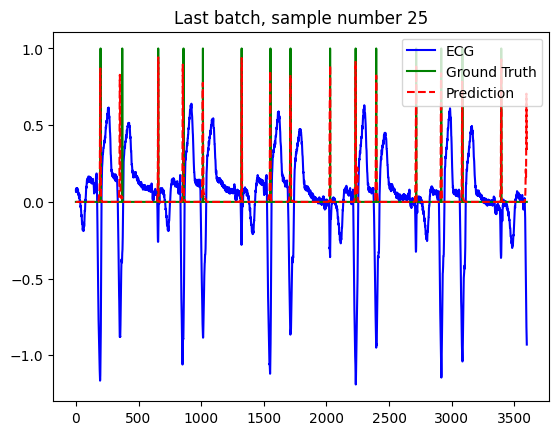

100%|██████████| 238/238 [01:33<00:00,  2.56it/s]



Train Loss: 0.0325
train Weighted Accuracy: 0.98793
train F1 Score: 0.93755
train TPR: 0.97624
train FPR: 0.00038
train TNR: 0.99962
train FNR: 0.02376



100%|██████████| 40/40 [00:05<00:00,  7.45it/s]



Validation Loss: 0.0315
validation Weighted Accuracy: 0.98733
validation F1 Score: 0.94477
validation TPR: 0.97497
validation FPR: 0.00031
validation TNR: 0.99969
validation FNR: 0.02503

====Epoch [11/50]====


100%|█████████▉| 237/238 [01:23<00:00,  2.89it/s]

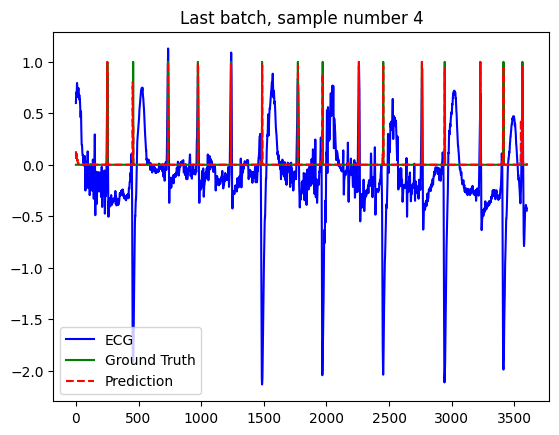

100%|██████████| 238/238 [01:24<00:00,  2.83it/s]



Train Loss: 0.0309
train Weighted Accuracy: 0.98890
train F1 Score: 0.94413
train TPR: 0.97812
train FPR: 0.00033
train TNR: 0.99967
train FNR: 0.02188



100%|██████████| 40/40 [00:05<00:00,  7.56it/s]



Validation Loss: 0.0285
validation Weighted Accuracy: 0.98986
validation F1 Score: 0.95319
validation TPR: 0.98000
validation FPR: 0.00027
validation TNR: 0.99973
validation FNR: 0.02000

====Epoch [12/50]====


100%|█████████▉| 237/238 [01:23<00:00,  2.91it/s]

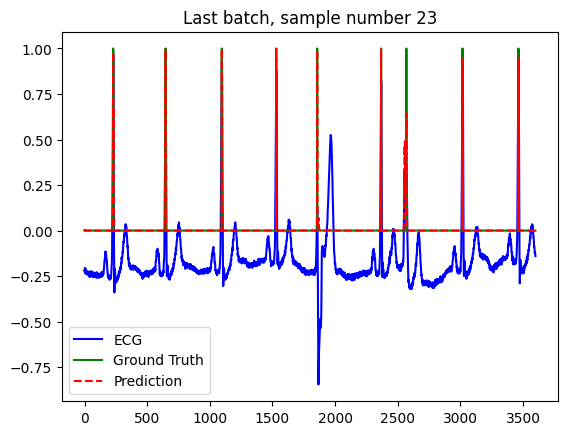

100%|██████████| 238/238 [01:24<00:00,  2.81it/s]



Train Loss: 0.0299
train Weighted Accuracy: 0.98936
train F1 Score: 0.94807
train TPR: 0.97903
train FPR: 0.00030
train TNR: 0.99970
train FNR: 0.02097



100%|██████████| 40/40 [00:05<00:00,  7.62it/s]



Validation Loss: 0.0277
validation Weighted Accuracy: 0.99037
validation F1 Score: 0.95432
validation TPR: 0.98099
validation FPR: 0.00026
validation TNR: 0.99974
validation FNR: 0.01901

====Epoch [13/50]====


100%|█████████▉| 237/238 [01:26<00:00,  2.89it/s]

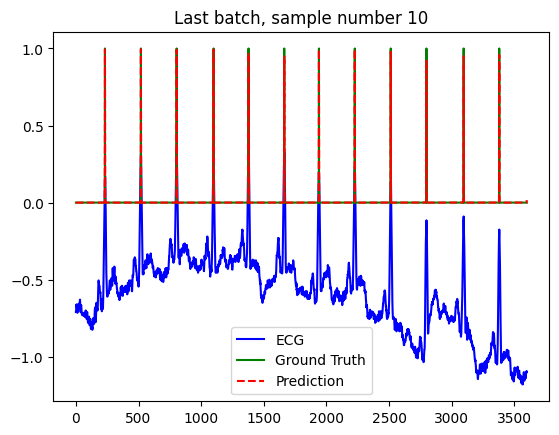

100%|██████████| 238/238 [01:27<00:00,  2.73it/s]



Train Loss: 0.0293
train Weighted Accuracy: 0.99014
train F1 Score: 0.95085
train TPR: 0.98057
train FPR: 0.00029
train TNR: 0.99971
train FNR: 0.01943



100%|██████████| 40/40 [00:05<00:00,  7.64it/s]



Validation Loss: 0.0272
validation Weighted Accuracy: 0.98894
validation F1 Score: 0.96129
validation TPR: 0.97808
validation FPR: 0.00020
validation TNR: 0.99980
validation FNR: 0.02192

====Epoch [14/50]====


100%|█████████▉| 237/238 [01:28<00:00,  2.81it/s]

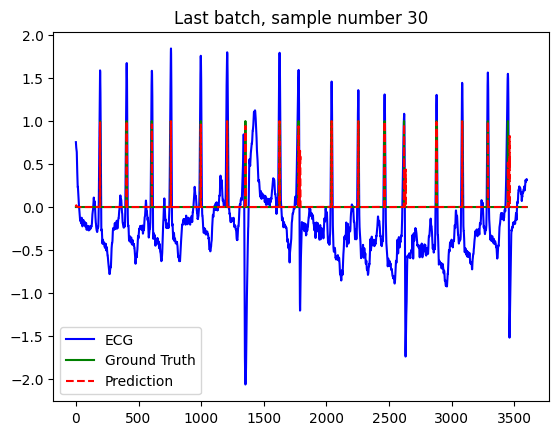

100%|██████████| 238/238 [01:29<00:00,  2.67it/s]



Train Loss: 0.0283
train Weighted Accuracy: 0.99034
train F1 Score: 0.95383
train TPR: 0.98095
train FPR: 0.00027
train TNR: 0.99973
train FNR: 0.01905



100%|██████████| 40/40 [00:05<00:00,  7.69it/s]



Validation Loss: 0.0272
validation Weighted Accuracy: 0.98946
validation F1 Score: 0.96191
validation TPR: 0.97912
validation FPR: 0.00020
validation TNR: 0.99980
validation FNR: 0.02088

====Epoch [15/50]====


100%|█████████▉| 237/238 [01:24<00:00,  2.87it/s]

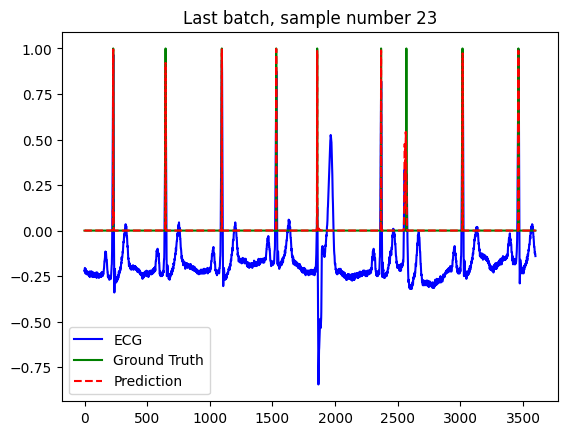

100%|██████████| 238/238 [01:26<00:00,  2.77it/s]



Train Loss: 0.0276
train Weighted Accuracy: 0.99088
train F1 Score: 0.95563
train TPR: 0.98202
train FPR: 0.00026
train TNR: 0.99974
train FNR: 0.01798



100%|██████████| 40/40 [00:05<00:00,  7.59it/s]



Validation Loss: 0.0269
validation Weighted Accuracy: 0.98966
validation F1 Score: 0.96134
validation TPR: 0.97952
validation FPR: 0.00021
validation TNR: 0.99979
validation FNR: 0.02048

====Epoch [16/50]====


100%|█████████▉| 237/238 [01:23<00:00,  2.88it/s]

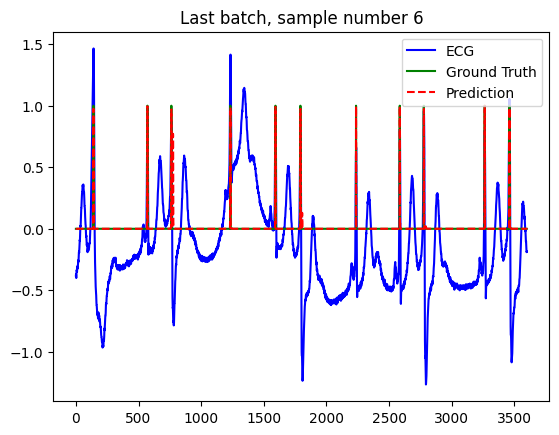

100%|██████████| 238/238 [01:24<00:00,  2.80it/s]



Train Loss: 0.0269
train Weighted Accuracy: 0.99120
train F1 Score: 0.95787
train TPR: 0.98265
train FPR: 0.00024
train TNR: 0.99976
train FNR: 0.01735



100%|██████████| 40/40 [00:05<00:00,  7.75it/s]



Validation Loss: 0.0250
validation Weighted Accuracy: 0.99161
validation F1 Score: 0.96345
validation TPR: 0.98343
validation FPR: 0.00020
validation TNR: 0.99980
validation FNR: 0.01657

====Epoch [17/50]====


100%|█████████▉| 237/238 [01:44<00:00,  1.81it/s]

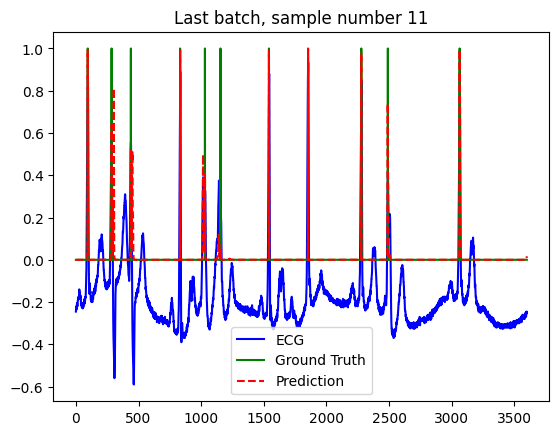

100%|██████████| 238/238 [01:45<00:00,  2.25it/s]



Train Loss: 0.0264
train Weighted Accuracy: 0.99175
train F1 Score: 0.95950
train TPR: 0.98374
train FPR: 0.00024
train TNR: 0.99976
train FNR: 0.01626



100%|██████████| 40/40 [00:05<00:00,  7.72it/s]



Validation Loss: 0.0250
validation Weighted Accuracy: 0.99134
validation F1 Score: 0.96537
validation TPR: 0.98287
validation FPR: 0.00019
validation TNR: 0.99981
validation FNR: 0.01713

====Epoch [18/50]====


100%|█████████▉| 237/238 [01:40<00:00,  2.91it/s]

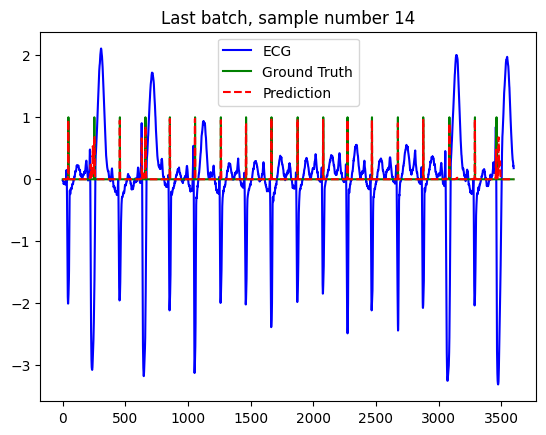

100%|██████████| 238/238 [01:41<00:00,  2.33it/s]



Train Loss: 0.0258
train Weighted Accuracy: 0.99208
train F1 Score: 0.96068
train TPR: 0.98439
train FPR: 0.00023
train TNR: 0.99977
train FNR: 0.01561



100%|██████████| 40/40 [00:09<00:00,  4.05it/s]



Validation Loss: 0.0242
validation Weighted Accuracy: 0.99272
validation F1 Score: 0.96236
validation TPR: 0.98567
validation FPR: 0.00022
validation TNR: 0.99978
validation FNR: 0.01433

====Epoch [19/50]====


100%|█████████▉| 237/238 [01:33<00:00,  2.75it/s]

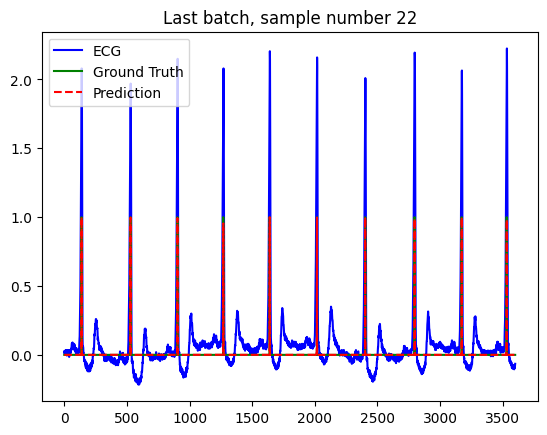

100%|██████████| 238/238 [01:34<00:00,  2.51it/s]



Train Loss: 0.0254
train Weighted Accuracy: 0.99243
train F1 Score: 0.96083
train TPR: 0.98510
train FPR: 0.00023
train TNR: 0.99977
train FNR: 0.01490



100%|██████████| 40/40 [00:07<00:00,  5.57it/s]



Validation Loss: 0.0238
validation Weighted Accuracy: 0.99249
validation F1 Score: 0.96323
validation TPR: 0.98519
validation FPR: 0.00021
validation TNR: 0.99979
validation FNR: 0.01481

====Epoch [20/50]====


100%|█████████▉| 237/238 [01:30<00:00,  2.87it/s]

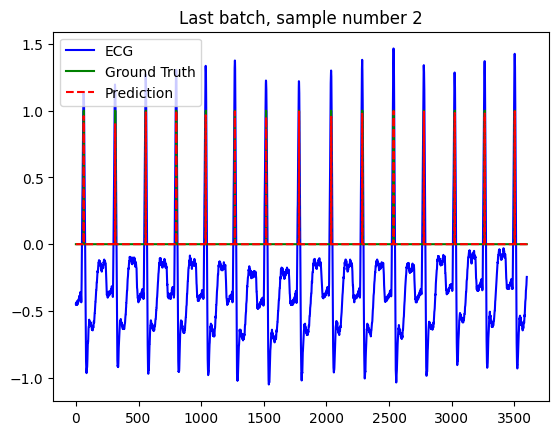

100%|██████████| 238/238 [01:31<00:00,  2.61it/s]



Train Loss: 0.0248
train Weighted Accuracy: 0.99291
train F1 Score: 0.96250
train TPR: 0.98604
train FPR: 0.00022
train TNR: 0.99978
train FNR: 0.01396



100%|██████████| 40/40 [00:05<00:00,  7.06it/s]



Validation Loss: 0.0233
validation Weighted Accuracy: 0.99233
validation F1 Score: 0.96421
validation TPR: 0.98487
validation FPR: 0.00020
validation TNR: 0.99980
validation FNR: 0.01513

====Epoch [21/50]====


100%|█████████▉| 237/238 [01:24<00:00,  2.90it/s]

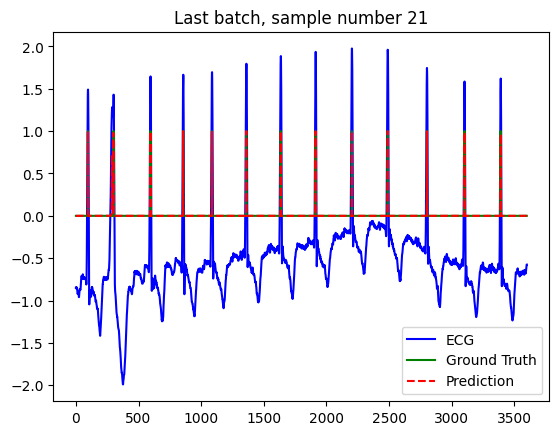

100%|██████████| 238/238 [01:25<00:00,  2.78it/s]



Train Loss: 0.0243
train Weighted Accuracy: 0.99297
train F1 Score: 0.96372
train TPR: 0.98616
train FPR: 0.00021
train TNR: 0.99979
train FNR: 0.01384



100%|██████████| 40/40 [00:05<00:00,  7.40it/s]



Validation Loss: 0.0239
validation Weighted Accuracy: 0.99182
validation F1 Score: 0.96495
validation TPR: 0.98383
validation FPR: 0.00019
validation TNR: 0.99981
validation FNR: 0.01617

====Epoch [22/50]====


100%|█████████▉| 237/238 [01:37<00:00,  2.83it/s]

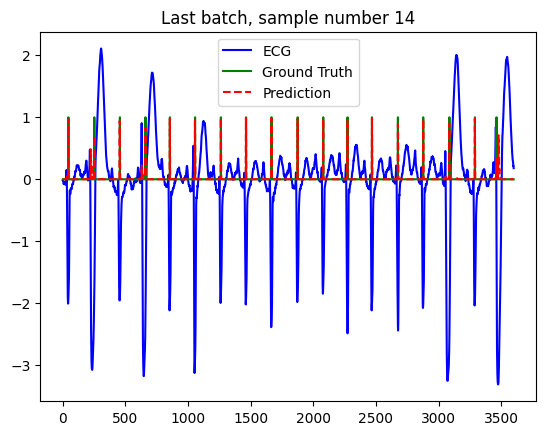

100%|██████████| 238/238 [01:38<00:00,  2.43it/s]



Train Loss: 0.0239
train Weighted Accuracy: 0.99307
train F1 Score: 0.96386
train TPR: 0.98635
train FPR: 0.00021
train TNR: 0.99979
train FNR: 0.01365



100%|██████████| 40/40 [00:05<00:00,  7.61it/s]



Validation Loss: 0.0233
validation Weighted Accuracy: 0.99119
validation F1 Score: 0.96680
validation TPR: 0.98255
validation FPR: 0.00018
validation TNR: 0.99982
validation FNR: 0.01745

====Epoch [23/50]====


100%|█████████▉| 237/238 [01:25<00:00,  2.85it/s]

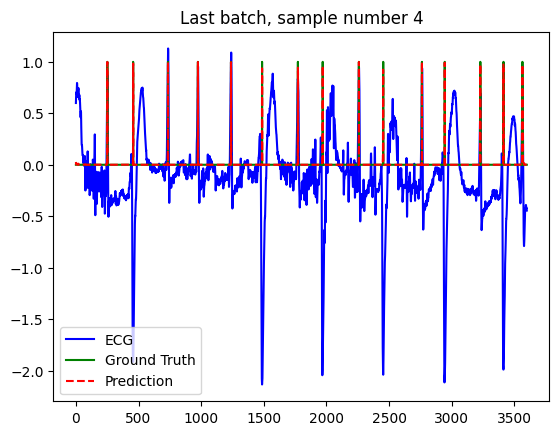

100%|██████████| 238/238 [01:26<00:00,  2.75it/s]



Train Loss: 0.0237
train Weighted Accuracy: 0.99336
train F1 Score: 0.96411
train TPR: 0.98694
train FPR: 0.00021
train TNR: 0.99979
train FNR: 0.01306



100%|██████████| 40/40 [00:05<00:00,  7.74it/s]



Validation Loss: 0.0229
validation Weighted Accuracy: 0.99201
validation F1 Score: 0.96735
validation TPR: 0.98419
validation FPR: 0.00018
validation TNR: 0.99982
validation FNR: 0.01581

====Epoch [24/50]====


100%|█████████▉| 237/238 [01:53<00:00,  4.17it/s]

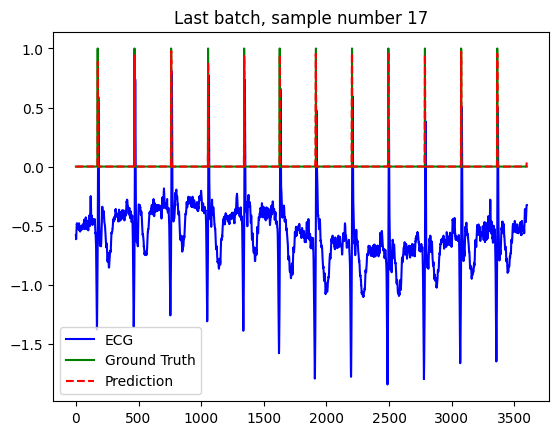

100%|██████████| 238/238 [01:54<00:00,  2.07it/s]



Train Loss: 0.0232
train Weighted Accuracy: 0.99368
train F1 Score: 0.96595
train TPR: 0.98756
train FPR: 0.00020
train TNR: 0.99980
train FNR: 0.01244



100%|██████████| 40/40 [00:10<00:00,  3.84it/s]



Validation Loss: 0.0230
validation Weighted Accuracy: 0.99175
validation F1 Score: 0.96701
validation TPR: 0.98367
validation FPR: 0.00018
validation TNR: 0.99982
validation FNR: 0.01633

====Epoch [25/50]====


100%|█████████▉| 237/238 [01:26<00:00,  2.83it/s]

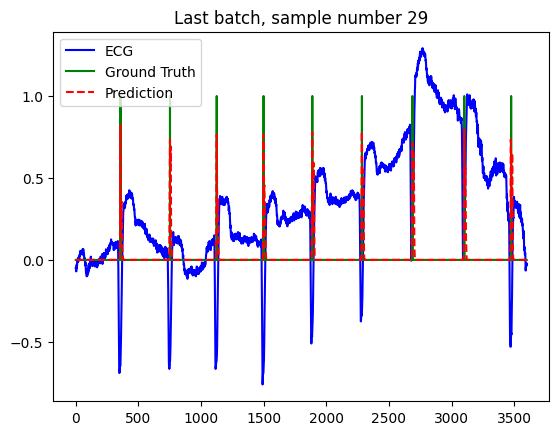

100%|██████████| 238/238 [01:27<00:00,  2.72it/s]



Train Loss: 0.0230
train Weighted Accuracy: 0.99374
train F1 Score: 0.96576
train TPR: 0.98769
train FPR: 0.00020
train TNR: 0.99980
train FNR: 0.01231



100%|██████████| 40/40 [00:07<00:00,  5.15it/s]



Validation Loss: 0.0225
validation Weighted Accuracy: 0.99228
validation F1 Score: 0.96710
validation TPR: 0.98475
validation FPR: 0.00018
validation TNR: 0.99982
validation FNR: 0.01525

====Epoch [26/50]====


100%|█████████▉| 237/238 [02:14<00:00,  2.43it/s]

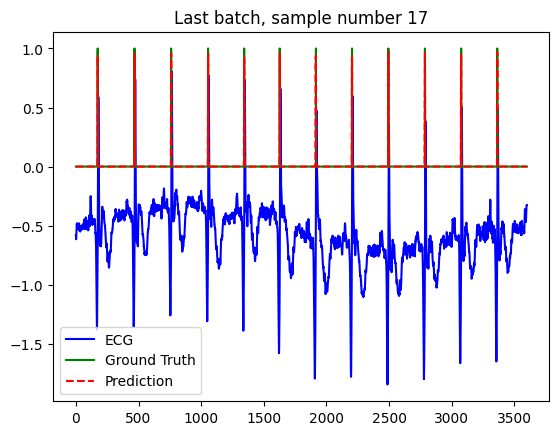

100%|██████████| 238/238 [02:16<00:00,  1.75it/s]



Train Loss: 0.0226
train Weighted Accuracy: 0.99374
train F1 Score: 0.96664
train TPR: 0.98768
train FPR: 0.00020
train TNR: 0.99980
train FNR: 0.01232



100%|██████████| 40/40 [00:05<00:00,  7.81it/s]



Validation Loss: 0.0230
validation Weighted Accuracy: 0.99200
validation F1 Score: 0.96706
validation TPR: 0.98419
validation FPR: 0.00018
validation TNR: 0.99982
validation FNR: 0.01581

====Epoch [27/50]====


100%|█████████▉| 237/238 [01:23<00:00,  2.88it/s]

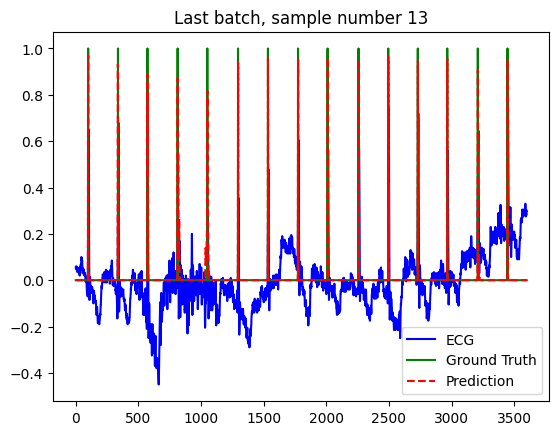

100%|██████████| 238/238 [01:24<00:00,  2.81it/s]



Train Loss: 0.0224
train Weighted Accuracy: 0.99397
train F1 Score: 0.96696
train TPR: 0.98814
train FPR: 0.00020
train TNR: 0.99980
train FNR: 0.01186



100%|██████████| 40/40 [00:06<00:00,  6.01it/s]



Validation Loss: 0.0222
validation Weighted Accuracy: 0.99237
validation F1 Score: 0.96922
validation TPR: 0.98491
validation FPR: 0.00017
validation TNR: 0.99983
validation FNR: 0.01509

====Epoch [28/50]====


100%|█████████▉| 237/238 [02:03<00:00,  2.16it/s]

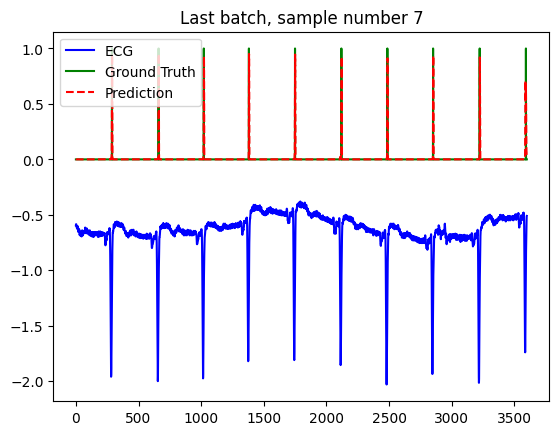

100%|██████████| 238/238 [02:05<00:00,  1.90it/s]



Train Loss: 0.0221
train Weighted Accuracy: 0.99428
train F1 Score: 0.96740
train TPR: 0.98875
train FPR: 0.00020
train TNR: 0.99980
train FNR: 0.01125



100%|██████████| 40/40 [00:05<00:00,  7.80it/s]



Validation Loss: 0.0222
validation Weighted Accuracy: 0.99309
validation F1 Score: 0.96935
validation TPR: 0.98635
validation FPR: 0.00017
validation TNR: 0.99983
validation FNR: 0.01365

====Epoch [29/50]====


100%|█████████▉| 237/238 [01:57<00:01,  1.17s/it]

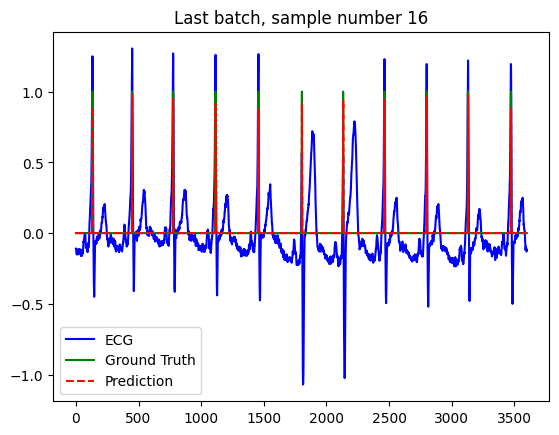

100%|██████████| 238/238 [01:59<00:00,  1.99it/s]



Train Loss: 0.0218
train Weighted Accuracy: 0.99416
train F1 Score: 0.96797
train TPR: 0.98851
train FPR: 0.00019
train TNR: 0.99981
train FNR: 0.01149



100%|██████████| 40/40 [00:06<00:00,  6.26it/s]



Validation Loss: 0.0219
validation Weighted Accuracy: 0.99324
validation F1 Score: 0.97201
validation TPR: 0.98662
validation FPR: 0.00015
validation TNR: 0.99985
validation FNR: 0.01338

====Epoch [30/50]====


100%|█████████▉| 237/238 [01:50<00:00,  1.78it/s]

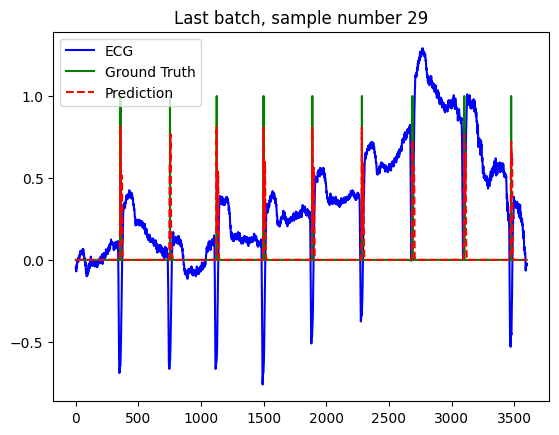

100%|██████████| 238/238 [01:51<00:00,  2.13it/s]



Train Loss: 0.0216
train Weighted Accuracy: 0.99431
train F1 Score: 0.96809
train TPR: 0.98882
train FPR: 0.00019
train TNR: 0.99981
train FNR: 0.01118



100%|██████████| 40/40 [00:05<00:00,  6.84it/s]



Validation Loss: 0.0215
validation Weighted Accuracy: 0.99373
validation F1 Score: 0.96691
validation TPR: 0.98766
validation FPR: 0.00019
validation TNR: 0.99981
validation FNR: 0.01234

====Epoch [31/50]====


100%|█████████▉| 237/238 [01:32<00:00,  2.64it/s]

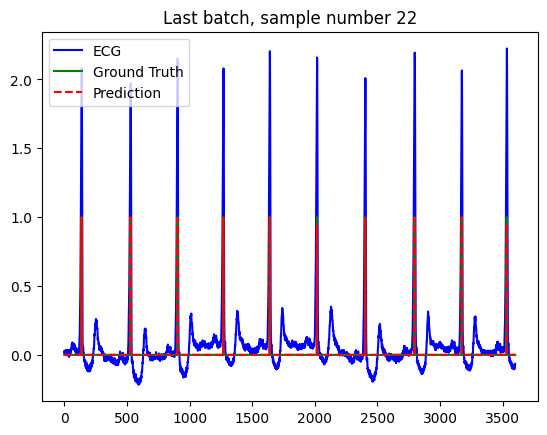

100%|██████████| 238/238 [01:33<00:00,  2.54it/s]



Train Loss: 0.0213
train Weighted Accuracy: 0.99478
train F1 Score: 0.96953
train TPR: 0.98974
train FPR: 0.00018
train TNR: 0.99982
train FNR: 0.01026



100%|██████████| 40/40 [00:05<00:00,  6.67it/s]



Validation Loss: 0.0211
validation Weighted Accuracy: 0.99286
validation F1 Score: 0.97234
validation TPR: 0.98587
validation FPR: 0.00015
validation TNR: 0.99985
validation FNR: 0.01413

====Epoch [32/50]====


100%|█████████▉| 237/238 [01:40<00:00,  2.43it/s]

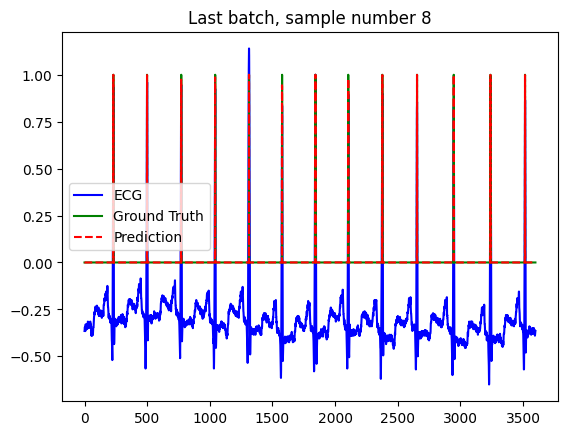

100%|██████████| 238/238 [01:41<00:00,  2.34it/s]



Train Loss: 0.0209
train Weighted Accuracy: 0.99478
train F1 Score: 0.96995
train TPR: 0.98974
train FPR: 0.00018
train TNR: 0.99982
train FNR: 0.01026



100%|██████████| 40/40 [00:05<00:00,  7.38it/s]



Validation Loss: 0.0222
validation Weighted Accuracy: 0.99211
validation F1 Score: 0.96802
validation TPR: 0.98439
validation FPR: 0.00017
validation TNR: 0.99983
validation FNR: 0.01561

====Epoch [33/50]====


100%|█████████▉| 237/238 [01:23<00:00,  2.89it/s]

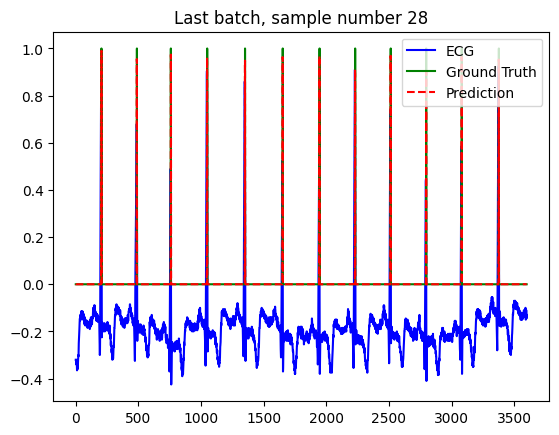

100%|██████████| 238/238 [01:24<00:00,  2.82it/s]



Train Loss: 0.0209


KeyboardInterrupt: 

In [7]:
model.train_model(x_train=x_train, y_train=y_train, epochs=50, x_val=x_val, y_val=y_val, batch_size=50)

In [ ]:
model.test_model(x_test, y_test, True)

In [ ]:
with open("./metrics/raw/ST_RES_NET.pkl", "wb") as f:
  pickle.dump(model.get_metrics(), f)

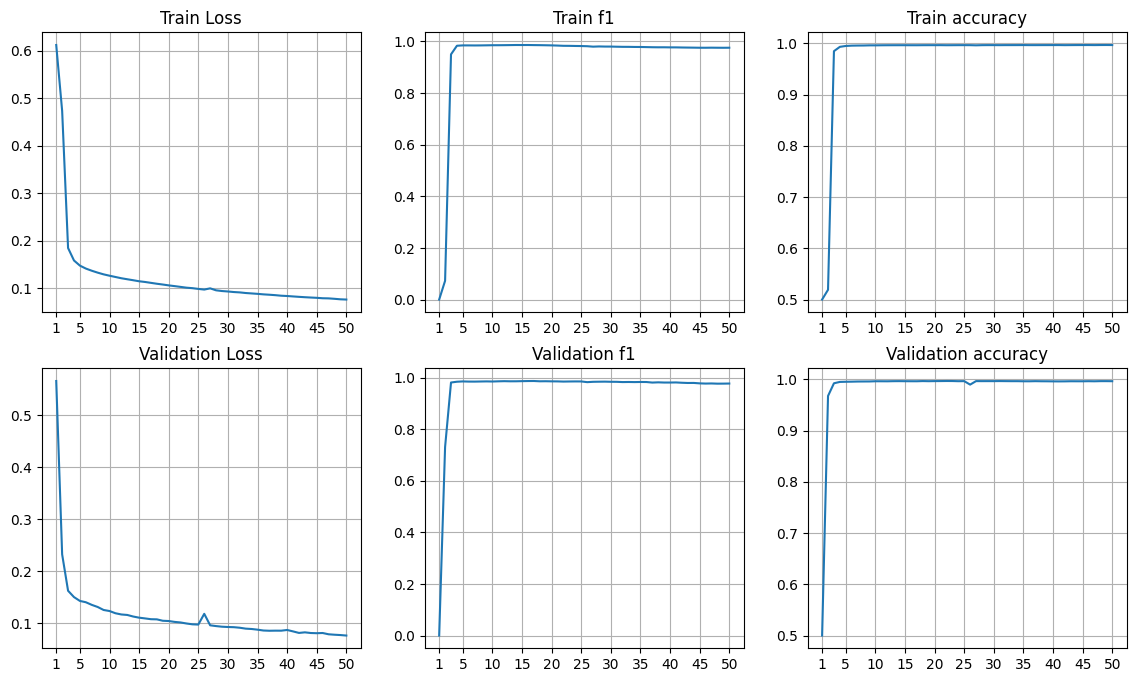

In [ ]:
with open("./metrics/raw/ST_RES_NET.pkl", "rb") as f:
  metrics = pickle.load(f)

from customLib.vis import plot_metrics
plot_metrics(metrics)

In [ ]:
print_metrics(metrics, "all", 48)

In [12]:
st_res_net = ST_RES_NET(learning_rate=1e-4, loss_pos_weight=10, loss_neg_weight=1)
st_res_net.load_state_dict(torch.load(".\\checkpoints\\st_res_net\\ST_RES_NET_epoch_49_acc_99.54_f1_0.96.pt", weights_only=True))

raw_st_res_net = ST_RES_NET(learning_rate=1e-4, loss_pos_weight=10, loss_neg_weight=1)
raw_st_res_net.load_state_dict(torch.load(".\\checkpoints\\st_res_net\\raw_ecgs\\ST_RES_NET_epoch_50_acc_97.60_f1_0.96.pt", weights_only=True))


x = np.load(fantasia_path + "\\preprocessed\\x.npy")
y = np.load(fantasia_path + "\\preprocessed\\y.npy")

x_raw = np.load(fantasia_path + "\\preprocessed\\raw\\st_res_net_windows\\x.npy")
y_raw = np.load(fantasia_path + "\\preprocessed\\raw\\st_res_net_windows\\y.npy")


x = np.expand_dims(x, 1)
y = np.expand_dims(y, 1)

x_raw =  np.expand_dims(x_raw, 1)
y_raw = np.expand_dims(y_raw, 1)

Training will be performed with: cuda:0
Training will be performed with: cuda:0


  0%|          | 0/2774 [00:00<?, ?it/s]

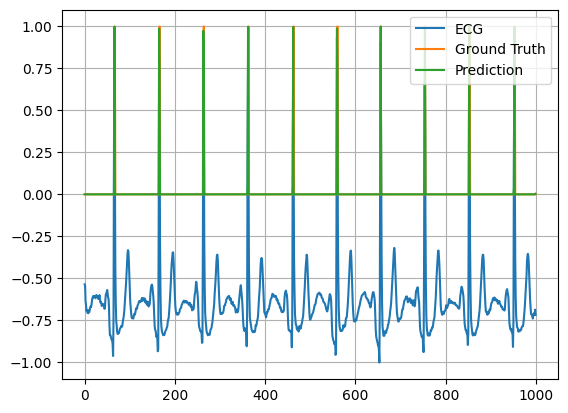

 10%|▉         | 275/2774 [00:06<00:49, 50.42it/s]

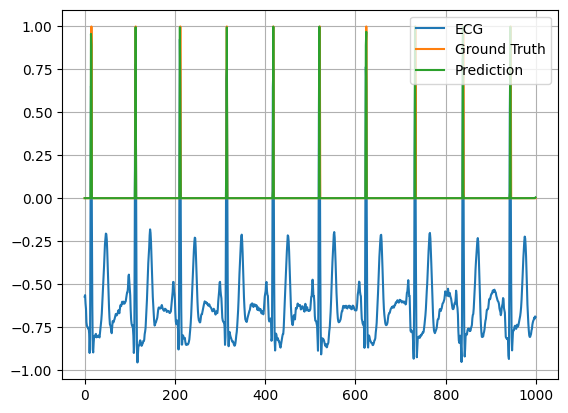

 20%|█▉        | 550/2774 [00:12<00:49, 44.65it/s]

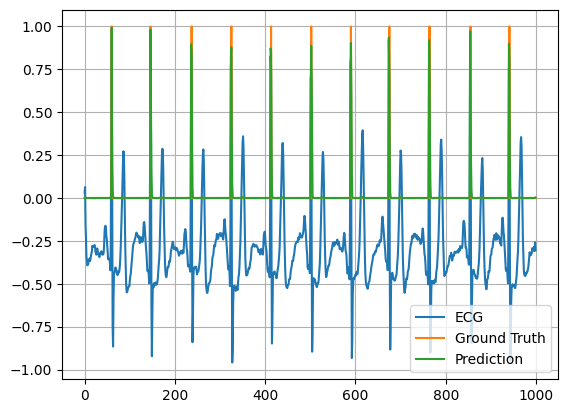

 30%|██▉       | 827/2774 [00:18<00:43, 44.59it/s]

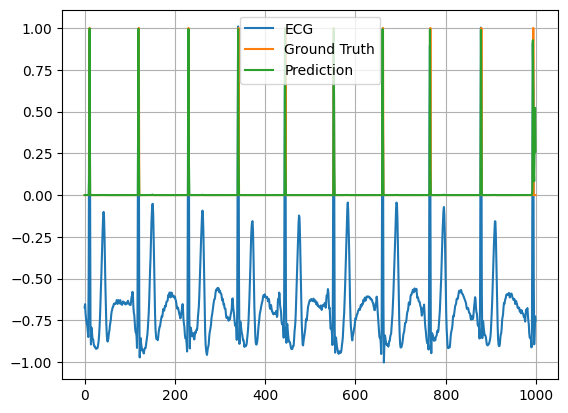

 40%|███▉      | 1106/2774 [00:25<00:31, 53.61it/s]

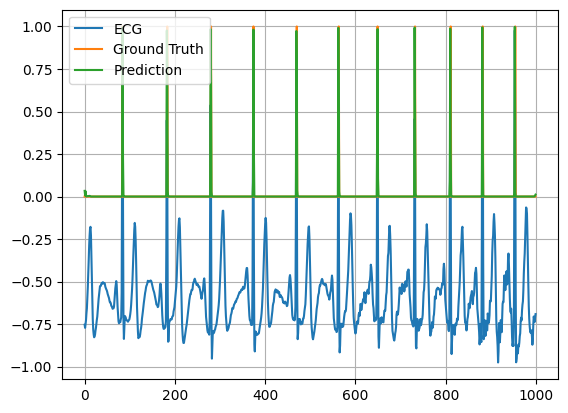

 50%|████▉     | 1383/2774 [00:30<00:26, 52.06it/s]

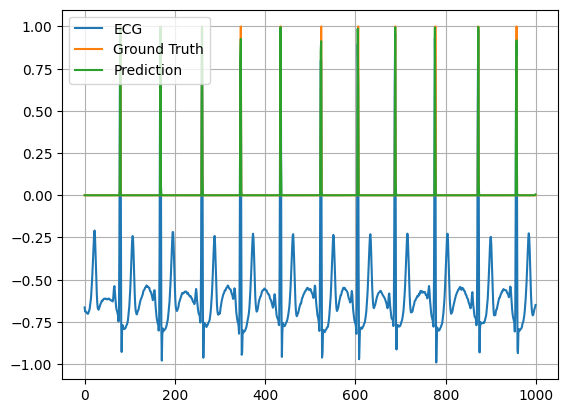

 60%|█████▉    | 1659/2774 [00:36<00:19, 57.41it/s]

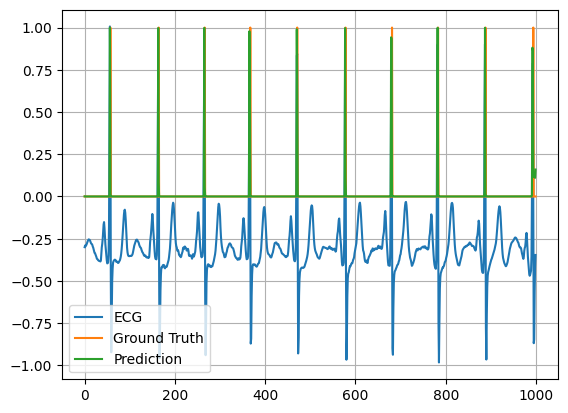

 70%|██████▉   | 1936/2774 [00:41<00:15, 55.42it/s]

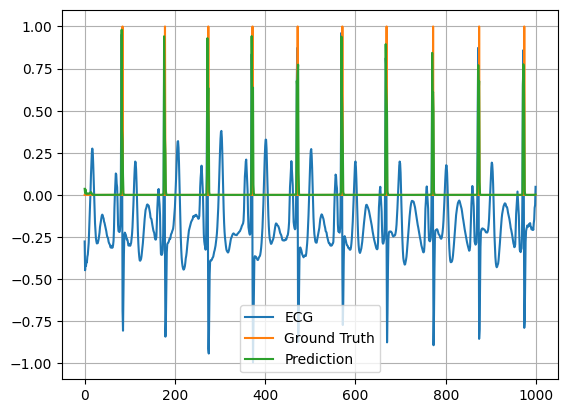

 80%|███████▉  | 2216/2774 [00:47<00:10, 55.71it/s]

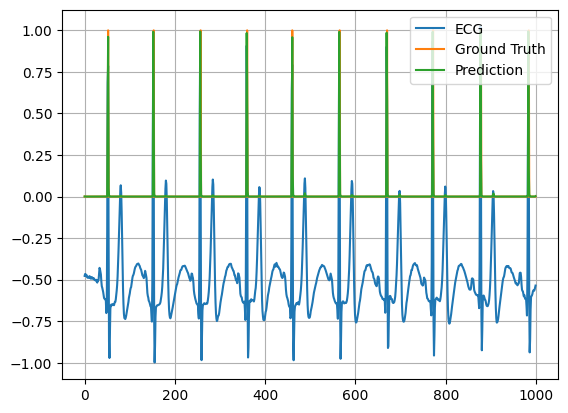

 90%|████████▉ | 2490/2774 [00:52<00:05, 52.32it/s]

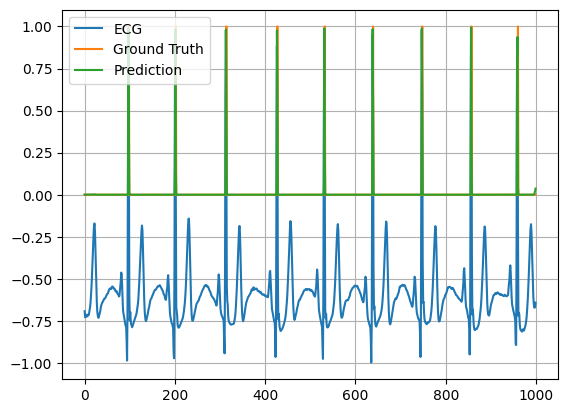

100%|█████████▉| 2766/2774 [00:57<00:00, 55.48it/s]

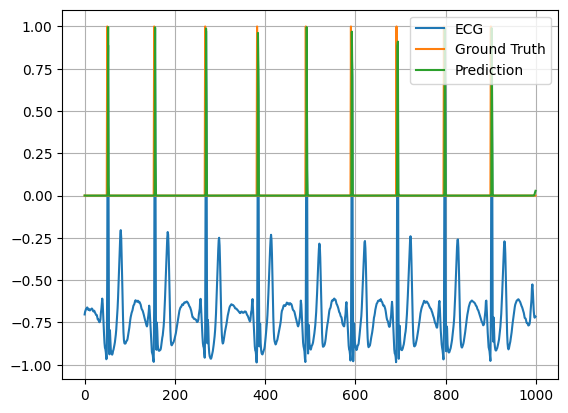

100%|██████████| 2774/2774 [00:57<00:00, 47.84it/s]



Test Loss: 0.2336
test Weighted Accuracy: 0.99949
test F1 Score: 0.98111
test TPR: 0.99937
test FPR: 0.00038
test TNR: 0.99962
test FNR: 0.00063



In [9]:
st_res_net.test_model(x_test=x, y_test=y, plot=True)

  0%|          | 0/1925 [00:00<?, ?it/s]

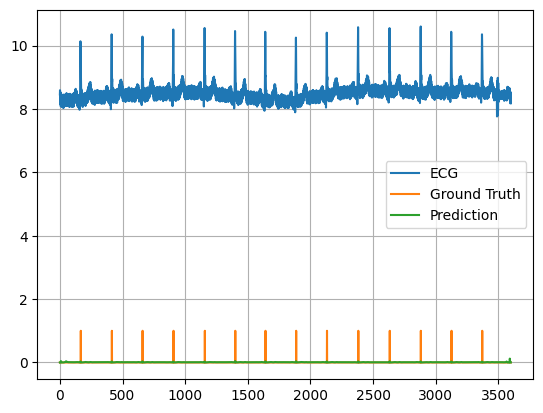

 10%|▉         | 191/1925 [00:11<01:33, 18.53it/s]

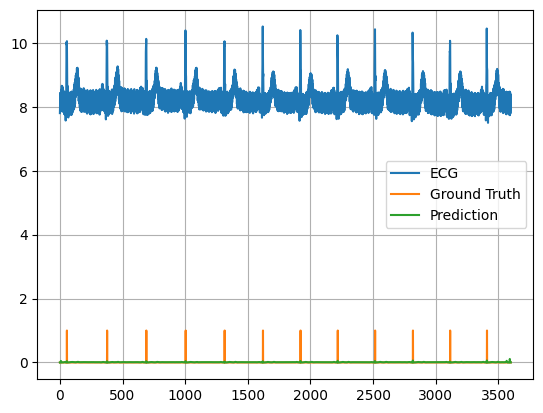

 20%|█▉        | 383/1925 [00:21<01:19, 19.33it/s]

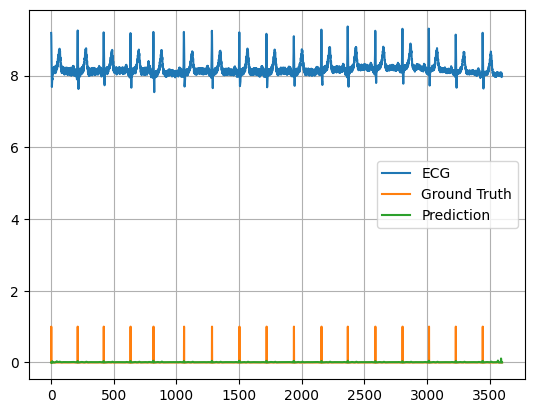

 30%|██▉       | 575/1925 [00:32<01:32, 14.59it/s]

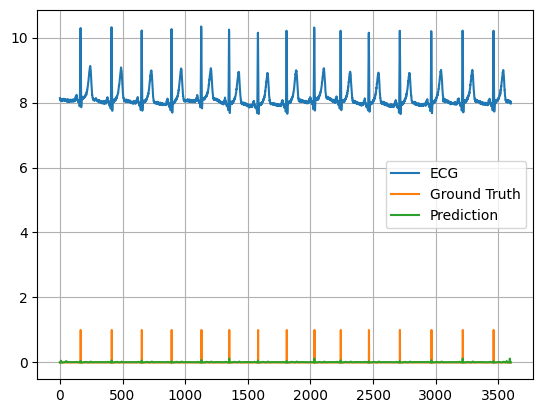

 40%|███▉      | 767/1925 [00:42<00:59, 19.44it/s]

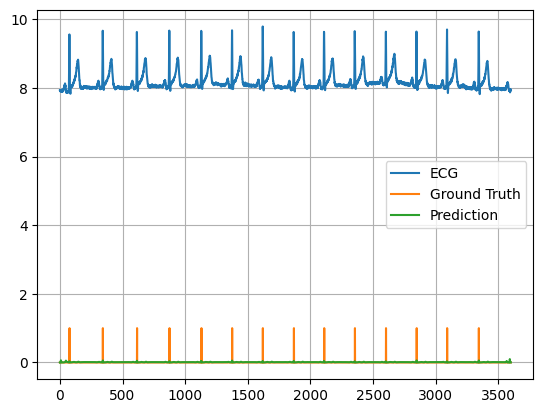

 50%|████▉     | 959/1925 [00:53<00:50, 19.15it/s]

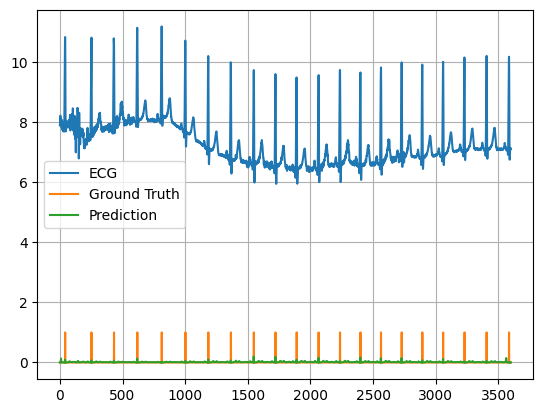

 60%|█████▉    | 1151/1925 [01:02<00:38, 20.11it/s]

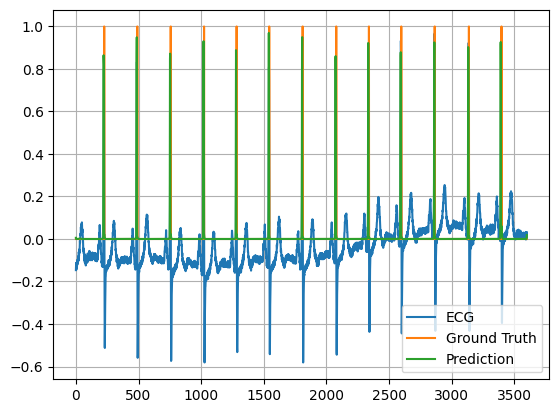

 70%|██████▉   | 1344/1925 [01:13<00:28, 20.06it/s]

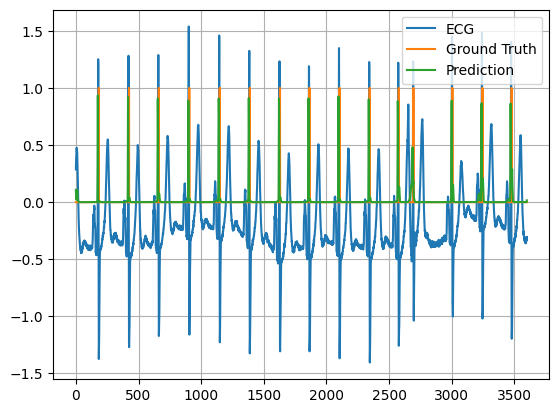

 80%|███████▉  | 1536/1925 [01:23<00:19, 20.21it/s]

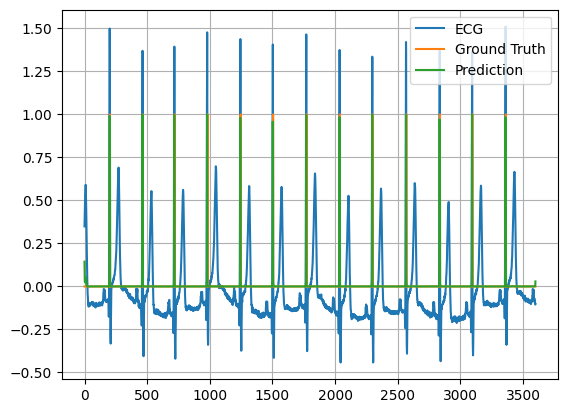

 90%|████████▉ | 1728/1925 [01:33<00:09, 20.04it/s]

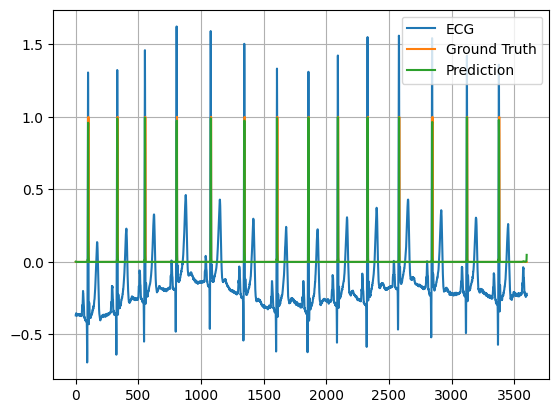

100%|█████████▉| 1918/1925 [01:43<00:00, 20.22it/s]

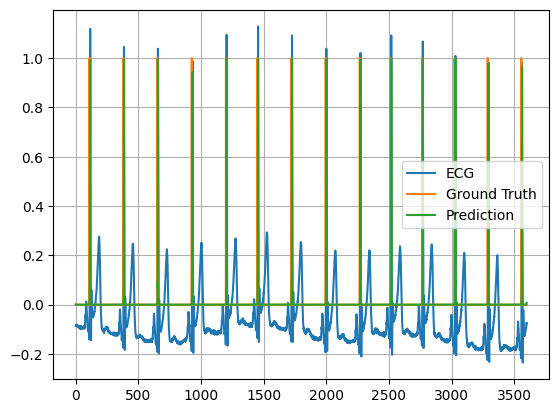

100%|██████████| 1925/1925 [01:43<00:00, 18.58it/s]



Test Loss: 0.2173
test Weighted Accuracy: 0.71792
test F1 Score: 0.57927
test TPR: 0.43612
test FPR: 0.00028
test TNR: 0.99972
test FNR: 0.56388



In [13]:
raw_st_res_net.test_model(x_test=x_raw, y_test=y_raw, plot=True)

### Notes
The ST_RES_NET output layer is Conv1D layer instead of the Dense layer, proposed in the original paper. The number of filters, kernel size, and strides in the Conv1D layer were adjusted to match the number of outpus samples in the original signal.

The Linear / Dense layer resulted in a poor performance during training on both MITBIH and Apnea-ecg datasets. I did not investigate further this issue.

Also the ST_RES_NET model's performance has improved when the loss function has been changed from BCELoss to WeightedBCELoss. The weights are calculated based on the distribution of the labels.